In [85]:
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor

In [87]:
dataset = pd.read_csv('https://raw.githubusercontent.com/PJbourne/IA-course-tasks/refs/heads/main/auto-mpg.csv')

In [88]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


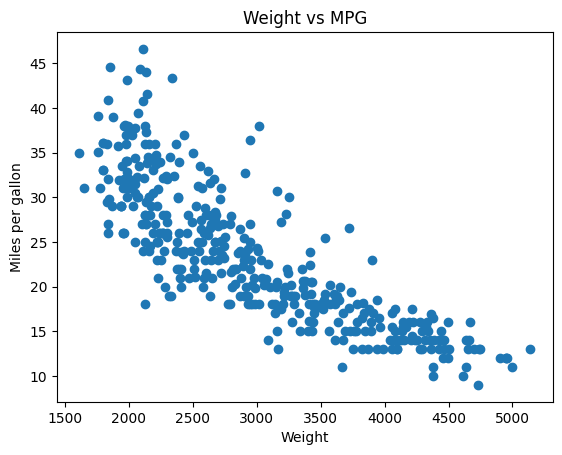

In [89]:
plt.scatter(dataset[['weight']], dataset[['mpg']])
plt.xlabel('Weight')
plt.ylabel('Miles per gallon')
plt.title('Weight vs MPG')
plt.show()

In [90]:
x = dataset[['weight']] * 0.453592
y = dataset[['mpg']] * 0.425144

In [91]:
print(x.describe())
print(y.describe())

            weight
count   398.000000
mean   1347.360846
std     384.120654
min     731.643896
25%    1008.675210
50%    1271.645172
75%    1636.559936
max    2331.462880
              mpg
count  398.000000
mean     9.997080
std      3.322919
min      3.826296
25%      7.440020
50%      9.778312
75%     12.329176
max     19.811710


In [92]:
escala = StandardScaler()
escala.fit(x)
x_scaled = escala.transform(x)

In [93]:
x_scaled_train, x_scaled_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3)

In [94]:
rna = MLPRegressor(hidden_layer_sizes=(10, 5),
                   max_iter=2000, 
                   tol=0.0000001,
                   learning_rate_init=0.1,
                   solver='sgd',
                   activation='logistic',
                   learning_rate='constant',
                   verbose=2
                   )

In [95]:
rna.fit(x_scaled_train, y_train)

Iteration 1, loss = 43.09491299
Iteration 2, loss = 6.83209719
Iteration 3, loss = 9.22983462
Iteration 4, loss = 5.34966333
Iteration 5, loss = 5.42196465
Iteration 6, loss = 4.94284825
Iteration 7, loss = 4.38918947
Iteration 8, loss = 3.61589708
Iteration 9, loss = 2.84234347
Iteration 10, loss = 2.29185433
Iteration 11, loss = 2.08603494
Iteration 12, loss = 1.95922199
Iteration 13, loss = 1.98801589
Iteration 14, loss = 2.03075613
Iteration 15, loss = 2.06811289
Iteration 16, loss = 2.09015892
Iteration 17, loss = 2.08736675
Iteration 18, loss = 2.06687714
Iteration 19, loss = 2.03769353
Iteration 20, loss = 2.01895036
Iteration 21, loss = 1.99497902
Iteration 22, loss = 1.98180668
Iteration 23, loss = 1.97147628
Training loss did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


c:\Users\Pablo Monteiro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=(10, 5),
             learning_rate_init=0.1, max_iter=2000, solver='sgd', tol=1e-07,
             verbose=2)

In [96]:
reglinear = SGDRegressor(max_iter=2000,
                         tol=0.0000001,
                         eta0=0.1,
                         learning_rate='constant',
                         verbose=2
                         )

In [97]:
reglinear.fit(x_scaled_train, y_train)

-- Epoch 1
Norm: 2.51, NNZs: 1, Bias: 9.591402, T: 278, Avg. loss: 2.940204
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.42, NNZs: 1, Bias: 10.067748, T: 556, Avg. loss: 1.942690
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.62, NNZs: 1, Bias: 10.077485, T: 834, Avg. loss: 1.857540
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.52, NNZs: 1, Bias: 9.634718, T: 1112, Avg. loss: 1.942586
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.78, NNZs: 1, Bias: 10.021554, T: 1390, Avg. loss: 1.978378
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 4.02, NNZs: 1, Bias: 9.912495, T: 1668, Avg. loss: 1.927667
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.58, NNZs: 1, Bias: 9.809548, T: 1946, Avg. loss: 1.950593
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.69, NNZs: 1, Bias: 9.959341, T: 2224, Avg. loss: 1.985299
Total training time: 0.00 seconds.
Convergence after 8 epochs took 0.00 seconds


c:\Users\Pablo Monteiro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(eta0=0.1, learning_rate='constant', max_iter=2000, tol=1e-07,
             verbose=2)

In [98]:
y_rna_previsao = rna.predict(x_scaled_test)
y_rl_previsao = reglinear.predict(x_scaled_test)

In [99]:
#calc r^2
r2_rna = r2_score(y_test, y_rna_previsao)
r2_rl = r2_score(y_test, y_rl_previsao)
print(f'R^2 RNA: {r2_rna}')
print(f'R^2 Regressão Linear: {r2_rl}')

R^2 RNA: 0.6935311727426021
R^2 Regressão Linear: 0.7015873900378695


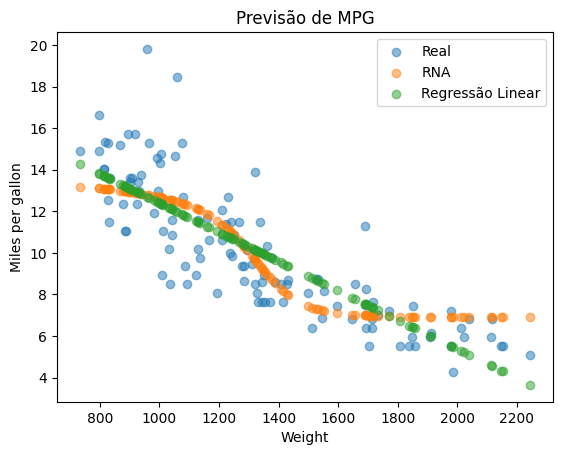

In [100]:
x_test = escala.inverse_transform(x_scaled_test)
plt.scatter(x_test, y_test, alpha=0.5, label='Real')
plt.scatter(x_test, y_rna_previsao, alpha=0.5, label='RNA')
plt.scatter(x_test, y_rl_previsao, alpha=0.5, label='Regressão Linear')
plt.ylabel('Miles per gallon')
plt.title('Previsão de MPG')
plt.xlabel('Weight')
plt.legend(loc=1)

In [101]:
rna2 = MLPRegressor(hidden_layer_sizes=(50, 25, 10),
                   max_iter=2000, 
                   tol=0.00000001,
                   learning_rate_init=0.1,
                   solver='sgd',
                   activation='relu',
                   learning_rate='constant',
                   verbose=2
                   )

In [102]:
rna2.fit(x_scaled_train, y_train)

Iteration 1, loss = 55.23881064
Iteration 2, loss = 82.33684297
Iteration 3, loss = 14.97613954
Iteration 4, loss = 6.30578702
Iteration 5, loss = 10.00464381
Iteration 6, loss = 12.36665144
Iteration 7, loss = 9.21063452
Iteration 8, loss = 6.11519508
Iteration 9, loss = 5.64056941
Iteration 10, loss = 5.56813392
Iteration 11, loss = 5.51952697
Iteration 12, loss = 5.03328778
Iteration 13, loss = 3.93853171
Iteration 14, loss = 3.21949597
Iteration 15, loss = 2.95672400
Iteration 16, loss = 3.02366930
Iteration 17, loss = 2.69717204
Iteration 18, loss = 2.49953661
Iteration 19, loss = 2.53841056
Iteration 20, loss = 2.63301418
Iteration 21, loss = 2.56389802
Iteration 22, loss = 2.47644924
Iteration 23, loss = 2.43492067
Iteration 24, loss = 2.42156247
Iteration 25, loss = 2.44483101
Iteration 26, loss = 2.71082454
Iteration 27, loss = 2.57087836
Iteration 28, loss = 2.47998861
Iteration 29, loss = 2.58172721
Iteration 30, loss = 2.57114654
Iteration 31, loss = 2.56961921
Iteration 32

c:\Users\Pablo Monteiro\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(50, 25, 10), learning_rate_init=0.1,
             max_iter=2000, solver='sgd', tol=1e-08, verbose=2)

In [105]:
y_rna2_previsao = rna2.predict(x_scaled_test)
r2_rna2 = r2_score(y_test, y_rna2_previsao)

In [108]:
r2_rna2 = r2_score(y_test, y_rna2_previsao)
print(f'R^2 RNA: {r2_rna}')
print(f'R^2 RNA2: {r2_rna2}')

R^2 RNA: 0.6935311727426021
R^2 RNA2: 0.5530340760980541
